# Tarea 1

In [221]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [222]:
file_path = 'athlete_events.csv'
df = pd.read_csv(file_path)

In [223]:
# Dimensiones
df.shape

(271116, 15)

In [224]:
# Tipos de cada columna
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [225]:
# 10 primera filas
df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [226]:
# Valores únicos para Year, Season, Sport y Medal
print(f"{df['Year'].unique()=}")
print(f"{df['Season'].unique()=}")
print(f"{df['Sport'].unique()=}")
print(f"{df['Medal'].unique()=}")

df['Year'].unique()=array([1992, 2012, 1920, 1900, 1988, 1994, 1932, 2002, 1952, 1980, 2000,
       1996, 1912, 1924, 2014, 1948, 1998, 2006, 2008, 2016, 2004, 1960,
       1964, 1984, 1968, 1972, 1936, 1956, 1928, 1976, 2010, 1906, 1904,
       1908, 1896])
df['Season'].unique()=array(['Summer', 'Winter'], dtype=object)
df['Sport'].unique()=array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gy

# Tarea 2

In [227]:
# Columnas con valores faltates y su porcentaje
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

print("Missing Data:")
print(missing_data[missing_data > 0])
print("\nMissing Percentage:")
print(missing_percentage[missing_percentage > 0])


Missing Data:
Age         9474
Height     60171
Weight     62875
Medal     231333
dtype: int64

Missing Percentage:
Age        3.494445
Height    22.193821
Weight    23.191180
Medal     85.326207
dtype: float64


In [228]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Imputar valores faltantes utilizando una estategia razonable

In [229]:
# Para Age, se puede usar la mediana al ser un porcentaje relativamente bajo
df['Age'] = df['Age'].fillna(df['Age'].median())

# Para Height y Weight, se puede usar la mediana agrupando por género y deporte
# En Height y Weight usé la mediana agrupada por género y deporte, porque esas variables influyen directamente. 
# Si quedaron valores NaN (grupos sin datos), usar la mediana global como fallback
df['Height'] = df.groupby(['Sex', 'Sport'])['Height'].transform(
    lambda x: x.fillna(x.median() if not x.median() != np.nan else df['Height'].median())
)
df['Weight'] = df.groupby(['Sex', 'Sport'])['Weight'].transform(
    lambda x: x.fillna(x.median() if not x.median() != np.nan else df['Weight'].median())
)

# En Medal, dado el 85% faltante, decidí no imputar porque sería introducir demasiado ruido. En lugar de eso lo trato como una categoría especial ('No Medal')
df['Medal'] = df['Medal'].fillna('No Medal')

c:\Users\marti\Proyectos\prueba-tecnica-verbum\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\marti\Proyectos\prueba-tecnica-verbum\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\marti\Proyectos\prueba-tecnica-verbum\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\marti\Proyectos\prueba-tecnica-verbum\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\marti\Proyectos\prueba-tecnica-verbum\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=

Valiedas si existen filas duplicadas o generadas por una combinación sensata de columnas y decidir si esas se eliminan o se preservan.

In [230]:
# Cantidad de filas duplicadas
print(df.duplicated().sum())

# Porcentaje de filas duplicadas
print((df.duplicated().sum() / len(df)) * 100)

1385
0.5108514436624914


In [231]:
# Muestra de filas duplicadas
df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()).head(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1251,704,Dsir Antoine Acket,M,27.0,175.0,70.0,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Medal
1252,704,Dsir Antoine Acket,M,27.0,175.0,70.0,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Medal
4281,2449,William Truman Aldrich,M,48.0,175.0,70.0,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",No Medal
4282,2449,William Truman Aldrich,M,48.0,175.0,70.0,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",No Medal
4283,2449,William Truman Aldrich,M,48.0,175.0,70.0,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",No Medal
4863,2777,Hermann Reinhard Alker,M,43.0,175.0,70.0,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",No Medal
4864,2777,Hermann Reinhard Alker,M,43.0,175.0,70.0,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",No Medal
4861,2777,Hermann Reinhard Alker,M,43.0,175.0,70.0,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",No Medal
4862,2777,Hermann Reinhard Alker,M,43.0,175.0,70.0,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",No Medal
4866,2777,Hermann Reinhard Alker,M,51.0,175.0,70.0,Germany,GER,1936 Summer,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Architecture, Unknown E...",No Medal


Este 0.5% aprox. no contribuye en nada al análisis, pues son filas totalmente iguales a otras. Por lo tanto, las elimino.

In [232]:
df = df.drop_duplicates()

Revisamos los IDs duplicados, que no deberían existir.

In [233]:
# Cantidad de elementos con el mismo ID
print(df[df.duplicated(subset=['ID'], keep=False)].shape[0])

# Porcentaje de elementos con el mismo ID
print(((df[df.duplicated(subset=['ID'], keep=False)].shape[0]) / len(df)) * 100)


191556
71.0174210602415


Al parecer el ID no es único para cada fila, así que extraemos una muestra visual de los duplicados para entender mejor la situación.

In [234]:
df[df.duplicated(subset=['ID'], keep=False)].sort_values(by='ID').head(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No Medal
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,No Medal
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,No Medal
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,No Medal
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,No Medal
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,No Medal


Hay bastantes filas que tienen el mismo ID, pero no son duplicados exactos. Por ejemplo, el ID 5 aparece en 6 filas diferentes, pero con diferentes valores en otras columnas (City, Year, Event, etc.). Parece ser que el ID indica a un individuo.

In [235]:
# Cantidad de duplicados por ID, nombre, sexo, edad, altura, peso
print(df.duplicated(subset=['ID', 'Name'], keep=False).sum())
print(df.nunique())

191556
ID        135571
Name      134732
Sex            2
Age           74
Height        95
Weight       220
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          4
dtype: int64


In [236]:
# Cantidad de personas que comparten el mismo ID, pero tienen distinto nombre
print(df[df.duplicated(subset=['ID'], keep=False) & ~df.duplicated(subset=['ID', 'Name'], keep=False)].shape[0])

0


Ya que nadie tiene el mismo ID, pero distinto nombre, podemos asumir que el ID es un identificador único para cada persona, y que las filas adicionales representan diferentes eventos o registros asociados a esa persona.

In [237]:
# Se elimina el ID, ya que no es un identificador único para cada fila y solo genera confusión.
df = df.drop(columns=['ID'])

# Tarea 3

In [238]:
df["Decade"] = (df["Year"] // 10) * 10

df["BMI"] = df["Weight"] / ((df["Height"] / 100) ** 2)

df = df[df["Season"] == "Summer"]

In [239]:
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Decade,BMI
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,1990,24.691358
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,2010,20.761246
2,Gunnar Nielsen Aaby,M,24.0,175.0,70.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,1920,22.857143
3,Edgar Lindenau Aabye,M,34.0,175.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900,22.857143
26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,70.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No Medal,1930,24.801587


# Tarea 4

In [240]:
# Calcular el KPI: El promedio de edad de los ganadores de medallas de Oro para los 3 deportes con el mayor número de atletas participantes únicos en los juegos Olímpicos de Verano desde el año 2000 (inclusive)
df_above_2000 = df[df["Year"] >= 2000]
top_sports = df_above_2000.groupby("Sport")["Name"].nunique().nlargest(3).index
gold_winners = df_above_2000[(df_above_2000["Sport"].isin(top_sports)) & (df_above_2000["Medal"] == "Gold")]
average_age = gold_winners.groupby("Sport")["Age"].mean()
kpi = average_age.to_dict()
print(kpi)

{'Athletics': 26.0, 'Football': 24.567251461988302, 'Swimming': 22.6891495601173}


# Tarea 5

El gráfico a continuación muestra los promedios de edad de los atletas en los Juegos Olímpicos de Verano en los 3 deportes con más jugadores únicos. Se observa una edad bastante similar entre los deportes, con una ligera variación en el promedio de edad. 

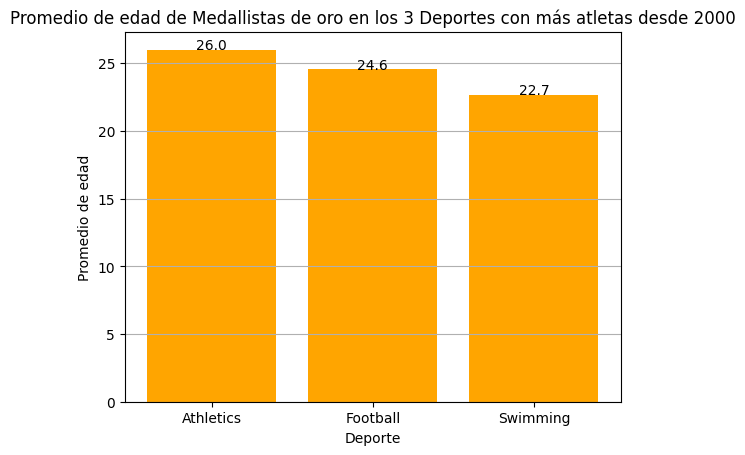

In [241]:
# Gráfico barras de los 3 deportes con más atletas únicos desde 2000
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], round(y[i], 1), ha='center')

plt.bar(average_age.index, average_age.values, color='orange')
plt.title('Promedio de edad de Medallistas de oro en los 3 Deportes con más atletas desde 2000')
plt.grid(axis='y')
plt.xlabel('Deporte')
plt.ylabel('Promedio de edad')
add_labels(average_age.index, average_age.values)
plt.show()


El siguiente gráfico muestra la distribución de edades de los atletas en los Juegos Olímpicos de Verano y de Invierno. Se puede observar que la mayoría de los atletas tienen entre 20 y 30 años, con una disminución gradual en el número de atletas a medida que aumenta la edad.

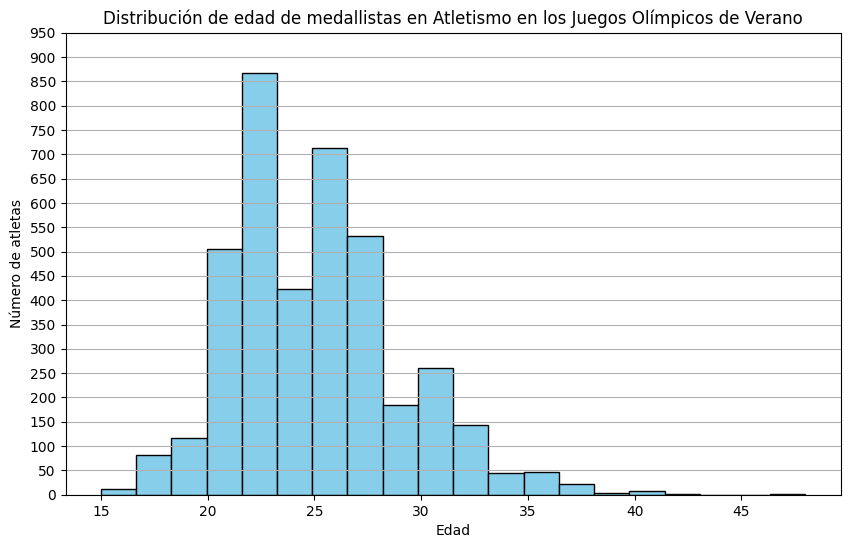

In [242]:
# Histograma que muestre la distribución de Age para todos los atletas que ganaron cualquier medalla en el deporte "Athletics" en los juegos de Verano
athletics_medalists = df[(df["Sport"] == "Athletics") & (df["Medal"] != "No Medal")]
plt.figure(figsize=(10, 6))
plt.hist(athletics_medalists["Age"], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de edad de medallistas en Atletismo en los Juegos Olímpicos de Verano')
plt.yticks(np.arange(0, 1000, 50))
plt.grid(axis='y')
plt.xlabel('Edad')
plt.ylabel('Número de atletas')
plt.show()


# Tarea 6

In [245]:
df.to_parquet('cleaned_olympic_data.parquet', engine='fastparquet')


In [246]:
with open("kpi.json", "w") as f:
    json.dump(kpi, f, indent=4)
